## data treatment

In [1]:
%pylab inline
import h5py

Populating the interactive namespace from numpy and matplotlib


In [2]:

def loadMCHD(fname):
    if '.npz' in fname:
        datas=np.load(fname)
        res=datas['res']
        ttlin=datas['ttlin']
        tstamps=datas['tstamps']
    elif '.hdf5' in fname or '.h5' in fname: 
        hf=h5py.File(fname, "r")
        res=hf['Scan']['Spectrums'][:]
        ttlin=hf['Scan']['TTLinput'][:]
        tstamps=hf['Scan'].attrs['Timestamps']

    delta=mean(res*(ttlin-1),axis=1)
    sigma=mean(res,axis=1)
    sdelta=sum(res*(ttlin-1),axis=1)
    ssigma=sum(res,axis=1)
    print(f"""Data size={shape(res)}, 
    Samples pos {shape(np.where((ttlin-1)==1))[1]}, 
    Samples neg {shape(np.where((ttlin-1)==-1))[1]},
    Dicarded samples {shape(np.where((ttlin-1)==0))[1]},
    Edges {shape(np.where(diff(ttlin)>=1))[1]}""")
    return sigma,delta

In [8]:
%%time
fname=r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\run30000-low3b.npz'
sigma,delta=loadMCHD(fname)

Data size=(2048, 30000), 
    Samples pos 14396, 
    Samples neg 14405,
    Dicarded samples 1199,
    Edges 1231
Wall time: 8.64 s


In [7]:
%%time
fname=r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\run30000-low3c.h5'
sigma,delta=loadMCHD(fname)

Data size=(2048, 30000), 
    Samples pos 14396, 
    Samples neg 14405,
    Dicarded samples 1199,
    Edges 1231
Wall time: 2.28 s


In [261]:
res

array([[1129, 1059,  956, ..., 1052, 1077, 1032],
       [1129, 1059,  956, ..., 1052, 1077, 1032],
       [ 878,  886,  818, ...,  836,  887,  932],
       ...,
       [1014,  986, 1007, ..., 1120, 1119, 1081],
       [1042, 1111, 1042, ...,  960, 1034, 1065],
       [1072, 1079, 1010, ...,  994, 1042, 1059]], dtype=uint16)

In [251]:
ttlin-1

TypeError: unsupported operand type(s) for -: 'Dataset' and 'int'

mod=70.27573333333333,66.61543166666668 dc =64211.70796666667,59868.38445499999,
Contrast=913.710962816942,898.7164528869547


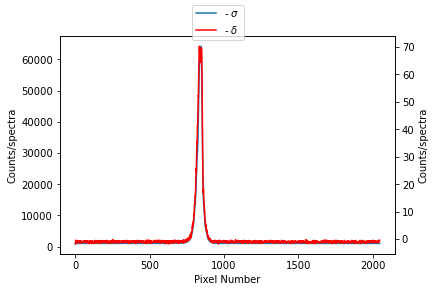

In [238]:
def pltMCHD(sigma,delta, label=''):
    fig=figure()
    plot(sigma,label=label+r'- $\sigma$')
    xlabel('Pixel Number')
    ylabel('Counts/spectra')
    twinx()
    plot(delta,'r',label=label+r'- $\delta$')
    ylabel('Counts/spectra')
    print(f"""mod={max(delta)},{mean(delta[830:850])} dc ={max(sigma)},{mean(sigma[830:850])},
Contrast={max(sigma)/max(delta)},{mean(sigma[830:850])/mean(delta[830:850])}""")
    fig.legend(loc="upper center")
pltMCHD(sigma,delta)

## plot(delta)
twinx()
plot(sigma)
print(f'mod={max(delta)}, dc ={max(sigma)} ,contrast={max(sigma)/max(delta)},1/contrast={1/max(sigma)*max(delta)}')

In [102]:
385/0.05,36/0.05

(7700.0, 720.0)

In [104]:
720/204*913

3222.3529411764703

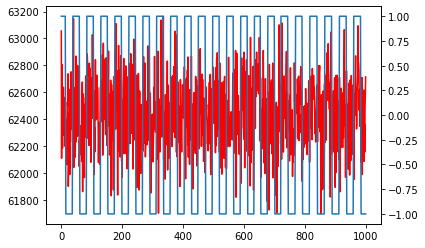

In [63]:
plot(res[840,:1000],'r-')
plt.twinx()
plot(ttlin[:1000]-1,'-')

845

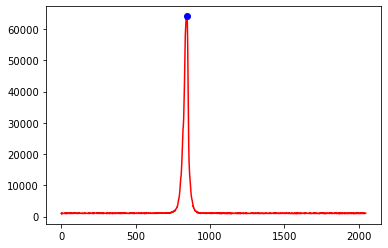

In [64]:
plot(res[:,0],'r')
plot(argmax(res[:,0]),max(res[:,0]),'bo')
argmax(res[:,0])

In [65]:
#getting mean sample frequency
Fs=np.timedelta64(1, 's')/diff(tstamps[:,0])[0]*shape(res)[1]
Fs,1/Fs

(47.856125344763505, 0.020895966666666665)

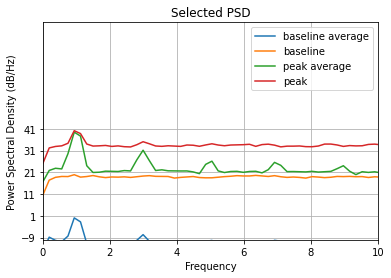

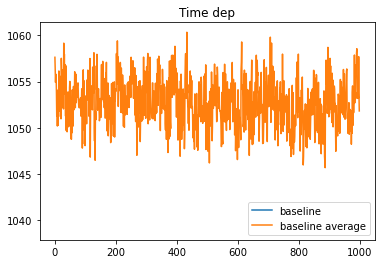

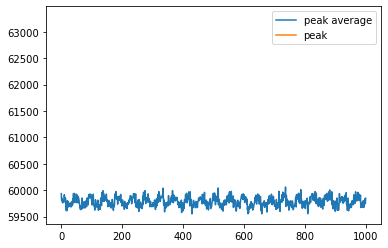

In [66]:
psd(1/2*(mean(res[:500],axis=0) 
        # +        mean(res[2000:,:],axis=0)
        )
    ,Fs=Fs, label='baseline average', detrend='mean');
psd(mean(res[0:1,:],axis=0),Fs=Fs, 
    label='baseline', detrend='mean');
psd(mean(res[830:850,:],axis=0),Fs=Fs,
    label='peak average', detrend='mean');

psd(mean(res[842:843,:],axis=0),Fs=Fs
    , detrend='mean',label='peak');
legend()
title('Selected PSD')
xlim(0,10)
ylim(-10,90)
figure()
title('Time dep')
plot(mean(res[0,:1000],axis=0),label='baseline')
plot(mean(res[0:600,:1000],axis=0),label='baseline average')
legend()
figure()
plot(mean(res[830:850,:1000],axis=0),label='peak average')
plot(mean(res[842,:1000],axis=0),label='peak')
legend()

In [8]:
%timeit mean(res*(ttlin-1),axis=1)

245 ms ± 7.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit average(res,weights=(ttlin-1),axis=1)

243 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


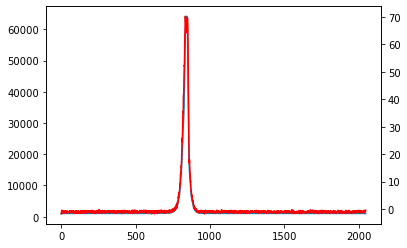

In [73]:
plot(mean(res,axis=1))
twinx()
plot(mean(res*(ttlin-1),axis=1),'r')

In [74]:
# contrast
max(mean(res*(ttlin-1),axis=1))/max(mean(res,axis=1))

0.0010944380013971065

(750.0, 900.0)

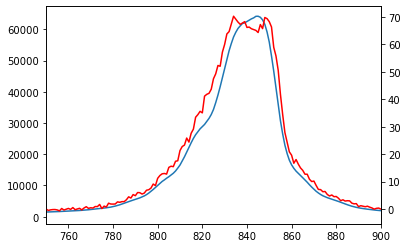

In [91]:
plot(mean(res,axis=1))
twinx()
plot(mean(res*(ttlin-1),axis=1),'r')
xlim(750,900)

(750.0, 900.0)

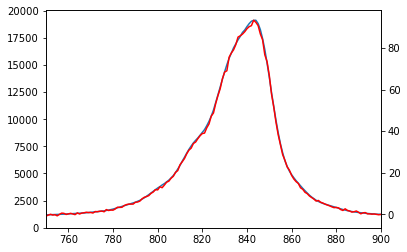

In [93]:
plot(mean(res,axis=1))
twinx()
plot(mean(res*(ttlin-1),axis=1),'r')
xlim(750,900)

In [95]:
100e6/100e3

1000.0

(-10.0, 10.0)

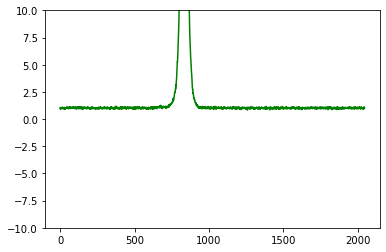

In [61]:
plot(average(res,weights=(ttlin-1),axis=1)/1000,'g')
ylim(-10,10)

## chuncked calculation

(-100.0, 100.0)

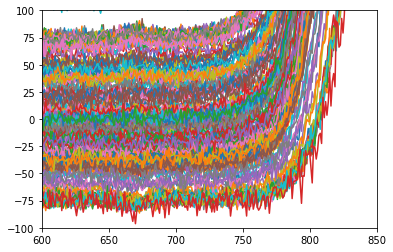

In [13]:

k=14*10
i,j=0,k
while j<30000:
    i+=k
    j+=k
    chunk_res=res[:,i:j]
    chunk_mod=(ttlin-1)[i:j]
    chunk_mean=mean(chunk_res*chunk_mod,axis=1)
    plot(chunk_mean)
xlim(600,850)
ylim(-100,100)

In [14]:
%timeit mean(chunk_res*chunk_mod,axis=1)

156 µs ± 3.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
13*5*0.037


2.405

## Simulate demodulation

In [9]:
spectrum=np.zeros(2048)

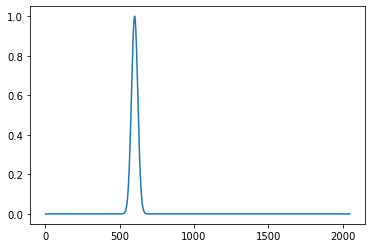

In [15]:
spectrum[500:700]=exp(-arange(-100,100)**2/30**2)
plot(spectrum)

In [64]:
from scipy import signal
l=3000
ttlin=signal.square(np.arange(l)/150*2*pi)
mod=1+1/10*ttlin
modsig=np.repeat(spectrum, l).reshape(2048,l)*mod

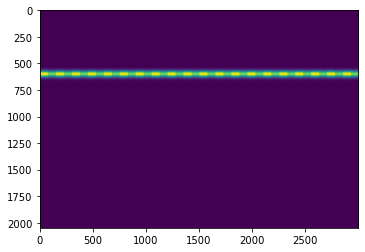

In [65]:
imshow(modsig)

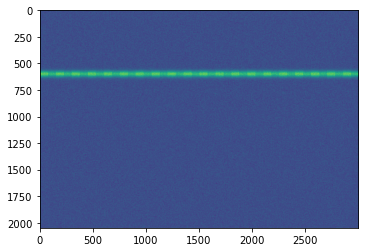

In [66]:
modnoise=modsig+np.random.random((2048,l))
imshow(modnoise)